In [126]:
#Visualizing hydrological balance from APEX output
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = pd.read_csv("C:/Users/shahi/Downloads/TxtInOut_APEX1501_modified/TxtInOut/SITE14.OUT", header=None, index_col= False, delimiter='=', skiprows=34042, nrows=4)
#skiprows = 38379 for exdata
data

,0,1,2,3,4,5,6
0,PER,-0.213906D+00 DF,-0.699356D+06 BSN,0.328944D+09 PCP,0.879020D+06 DN,0.132799D+06 NFIX,0.000000D+00
1,VOL,0.520434D+07 FNO,0.200454D+07 FNMN,0.545837D+06 FNMA,0.177128D+06 BURN,0.000000D+00 DPKN,0.843704D+05
2,PSON,0.000000D+00 YNWN,0.000000D+00 YN,0.237282D+06 WYLN,0.410902D+06 YLN,0.235528D+06 FSN,0.326945D+09
3,TLMN,0.000000D+00 TSMN,0.000000D+00 TRMN,0.000000D+00 TRON,0.000000D+00 RSDN,0.000000D+00,NaN


In [127]:
#Splitting output values and headers in different columns
#Loop to split data and labels in columns 1 to 5
for i in range(1, 6):
    data[i]=data[i].str.strip().str.replace(r'\s+', ' ', regex=True)
    data[[i, 6+i+1]]=data[i].str.split(' ', expand=True)

#Removing all whitespaces from first column
data[0]=data[0].str.strip()
#Rearranging dataframe such that all values are on the left and labels on the right
data.insert(7,7,data[0])
data.drop(0, axis=1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.213906D+00,-0.699356D+06,0.328944D+09,0.879020D+06,0.132799D+06,0.000000D+00,PER,DF,BSN,PCP,DN,NFIX
1,0.520434D+07,0.200454D+07,0.545837D+06,0.177128D+06,0.000000D+00,0.843704D+05,VOL,FNO,FNMN,FNMA,BURN,DPKN
2,0.000000D+00,0.000000D+00,0.237282D+06,0.410902D+06,0.235528D+06,0.326945D+09,PSON,YNWN,YN,WYLN,YLN,FSN
3,0.000000D+00,0.000000D+00,0.000000D+00,0.000000D+00,0.000000D+00,NaN,TLMN,TSMN,TRMN,TRON,RSDN,None


In [128]:
#data_ra=data_rearranged
#Rearranging data in format for dataframe processing
data_ra=pd.DataFrame(columns=['Variable', 'Value'])
data_ra['Variable']=pd.concat([data[7], data[8], data[9], data[10], data[11], data[12]])
data_ra['Value']=pd.concat([data[1], data[2], data[3], data[4], data[5], data[6]])
data_ra.reset_index(inplace=True)
data_ra

,index,Variable,Value
0,0,PER,-0.213906D+00
1,1,VOL,0.520434D+07
2,2,PSON,0.000000D+00
3,3,TLMN,0.000000D+00
4,0,DF,-0.699356D+06
5,1,FNO,0.200454D+07
6,2,YNWN,0.000000D+00
7,3,TSMN,0.000000D+00
8,0,BSN,0.328944D+09
9,1,FNMN,0.545837D+06


In [129]:
#Reformatting FORTRAN data to python numeric data and rearranging order of variables
#for logical flow
data_ra['Value']=data_ra['Value'].str.replace('D', 'E')
data_ra['Value']=data_ra['Value'].astype('float64')

#Separately recording per and df values to print later in graph
per=float(data_ra.iloc[0,2])
df=data_ra.iloc[4,2]

data_ra.drop('index', axis=1,inplace=True)
data_ra=data_ra.reindex([4,8,12,16,20,1,5,9,13,17,21,2,6,10,14,18,22,3,7,11,15,19])

storage_change={"Variable":"CS", "Value":(data_ra.iloc[16,1]-data_ra.iloc[1,1])} #Defining new variable to show change in storage
data_ra=pd.concat([data_ra, pd.DataFrame([storage_change])],ignore_index=True)
#data_ra.drop(4, axis='index', inplace=True)
data_ra

,Variable,Value
0,DF,-699356.0
1,BSN,328944000.0
2,PCP,879020.0
3,DN,132799.0
4,NFIX,0.0
5,VOL,5204340.0
6,FNO,2004540.0
7,FNMN,545837.0
8,FNMA,177128.0
9,BURN,0.0


In [130]:
#Initial attempt to reindex 
#data_ra=data_ra.T
# data_ra.columns=data_ra.iloc[0]
# data_ra=data_ra.drop(data_ra.index[0])
# data_ra

In [131]:
# Initial attempt to plot balance in piechart
# data_ra.drop({0, 1, 2, 4, 6, 11, 14, 15, 16, 18, 20, 21,22, 23}, axis='index', inplace=True)
# plt.pie(data_ra['Value'], labels=data_ra['Variable'], autopct='%1.1f%%')
# plt.show()

In [132]:
# Initial attempt to make outflow variables negative 
#data_ra[['WYLD', 'DPRK', 'ET', 'IRDL', 'FSW', 'FGWS', 'FRSV', 'FSNO', 'FSWL']]*=(-1)
# data_ra
#data_ra=data_ra.iloc[0,1]*=(-1)
r=[1,3,5,9,12, 13, 14,15]
data_ra["Value"].iloc[r]*=(-1)
data_ra

C:\Users\shahi\AppData\Local\Temp\ipykernel_14904\2898554678.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_ra["Value"].iloc[r]*=(-1)
C:\Users\shahi\AppData\Local\Temp\ipykernel_14904\2898554678.py:6: SettingWithCopyWarning: 
A val

,Variable,Value
0,DF,-699356.0
1,BSN,-328944000.0
2,PCP,879020.0
3,DN,-132799.0
4,NFIX,0.0
5,VOL,-5204340.0
6,FNO,2004540.0
7,FNMN,545837.0
8,FNMA,177128.0
9,BURN,-0.0


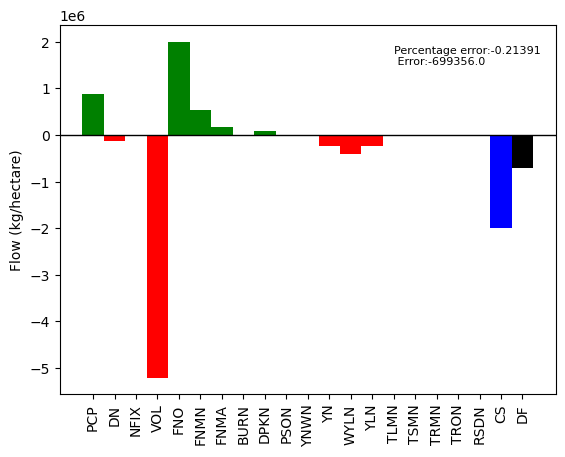

,Variable,Value
1,PCP,879020.0
2,DN,-132799.0
3,NFIX,0.0
4,VOL,-5204340.0
5,FNO,2004540.0
6,FNMN,545837.0
7,FNMA,177128.0
8,BURN,-0.0
9,DPKN,84370.4
10,PSON,0.0


In [151]:
color=['green','red', 'red', 'red', 'green', 'green', 'green','red','green','green','red', 'red', 'red','red', 
       'grey', 'grey', 'grey','grey', 'grey','blue','black']
plot_data=data_ra
plot_data=plot_data.drop(plot_data.index[1])
plot_data=plot_data.drop(plot_data.index[15])
plot_data=pd.concat([plot_data, plot_data[:1]], ignore_index=True)
plot_data=plot_data.drop(plot_data.index[0])

fig,ax=plt.subplots()
ax.bar(plot_data['Variable'], height=plot_data['Value'], width=1, color=color)
plt.xticks(rotation=90)
plt.ylabel("Flow (kg/hectare)")
plt.axhline(y=0, linewidth=1, color='k')
#err=f"Percentage error={data.iloc[0,0]}\n Error={data.iloc[0,1]}"
err=f"Percentage error:{per:.5f}\n Error:{df}"
ax.text(14, 1.5E6, err, fontsize=8)
plt.show()
plot_data

In [134]:
#NOT USEFUL, INITIAL ATTEMPT TO MAKE PLOT USING PANDAS,NOT MATPLOTLIB
# #plt.bar(data_ra.headers, height=data_ra)
# #data_ra=data_ra.T
# data_ra
# plt.bar(data_ra["PER"], data_ra["BSW"])
# plt.show()

# #print(""

In [135]:
# data_ra.drop({'PER','DF'}, axis=0, inplace=True)
# data_ra

In [136]:
balance=data_ra['Value'].sum()
balance

-7227311.600000024